In [1]:
# Import dependencies.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pandas.io.json import json_normalize
import json

In [2]:
# Import our new csv to analyze and convert to a dataframe.
movies = "movie_data.csv"
movie_data = pd.read_csv(movies)
movie_data.head()

,Unnamed: 0,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year,metacritic,synopsis,cast
0,0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,700059566.0,2018,88.0,"T'Challa, heir to the hidden but advanced king...","Chadwick Boseman, Michael B. Jordan, Lupita Ny..."
1,1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,678815482.0,2018,68.0,The Avengers and their allies must be willing ...,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa..."
2,2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,608581744.0,2018,80.0,The Incredibles hero family takes on a new mis...,"Craig T. Nelson, Holly Hunter, Sarah Vowell, H..."
3,3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,416769345.0,2018,51.0,When the island's dormant volcano begins roari...,"Chris Pratt, Bryce Dallas Howard, Rafe Spall, ..."
4,4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,318491426.0,2018,66.0,Foul-mouthed mutant mercenary Wade Wilson (a.k...,"Ryan Reynolds, Josh Brolin, Morena Baccarin, J..."


In [3]:
# Narrow down the dataframe to only the columns we need for genre analysis.
movie_genre = movie_data[["Main_Genre", "year", "title", "worldwide_gross"]]
movie_genre["worldwide_gross"] = (movie_genre["worldwide_gross"].astype(float))/1_000_000

# Rename columns for readability.
movie_genre = movie_genre.rename(columns = {"Main_Genre" : "Genre",
                                    "year" : "Year",
                                    "title" : "Title",
                                    "worldwide_gross" : "Earnings"})
# Print the new dataframe.
movie_genre

C:\Users\Veron\Anaconda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Genre,Year,Title,Earnings
0,Action,2018,Black Panther,700.059566
1,Action,2018,Avengers: Infinity War,678.815482
2,Animation,2018,Incredibles 2,608.581744
3,Action,2018,Jurassic World: Fallen Kingdom,416.769345
4,Action,2018,Deadpool 2,318.491426
...,...,...,...,...
105,Animation,2008,Madagascar: Escape 2 Africa,603.900354
106,Adventure,2008,Quantum of Solace,586.090727
107,Sci-Fi,2008,Iron Man,585.174222
108,Animation,2008,WALL-E,521.311860


In [4]:
# genre_analysis = pd.DataFrame(group_by)
# genre_gross = genre_analysis["Earnings"].max()
# genre_analysis = genre_analysis.reset_index(drop=True)
# genre_gross
# genre_analysis.reset_index()
# genre_analysis

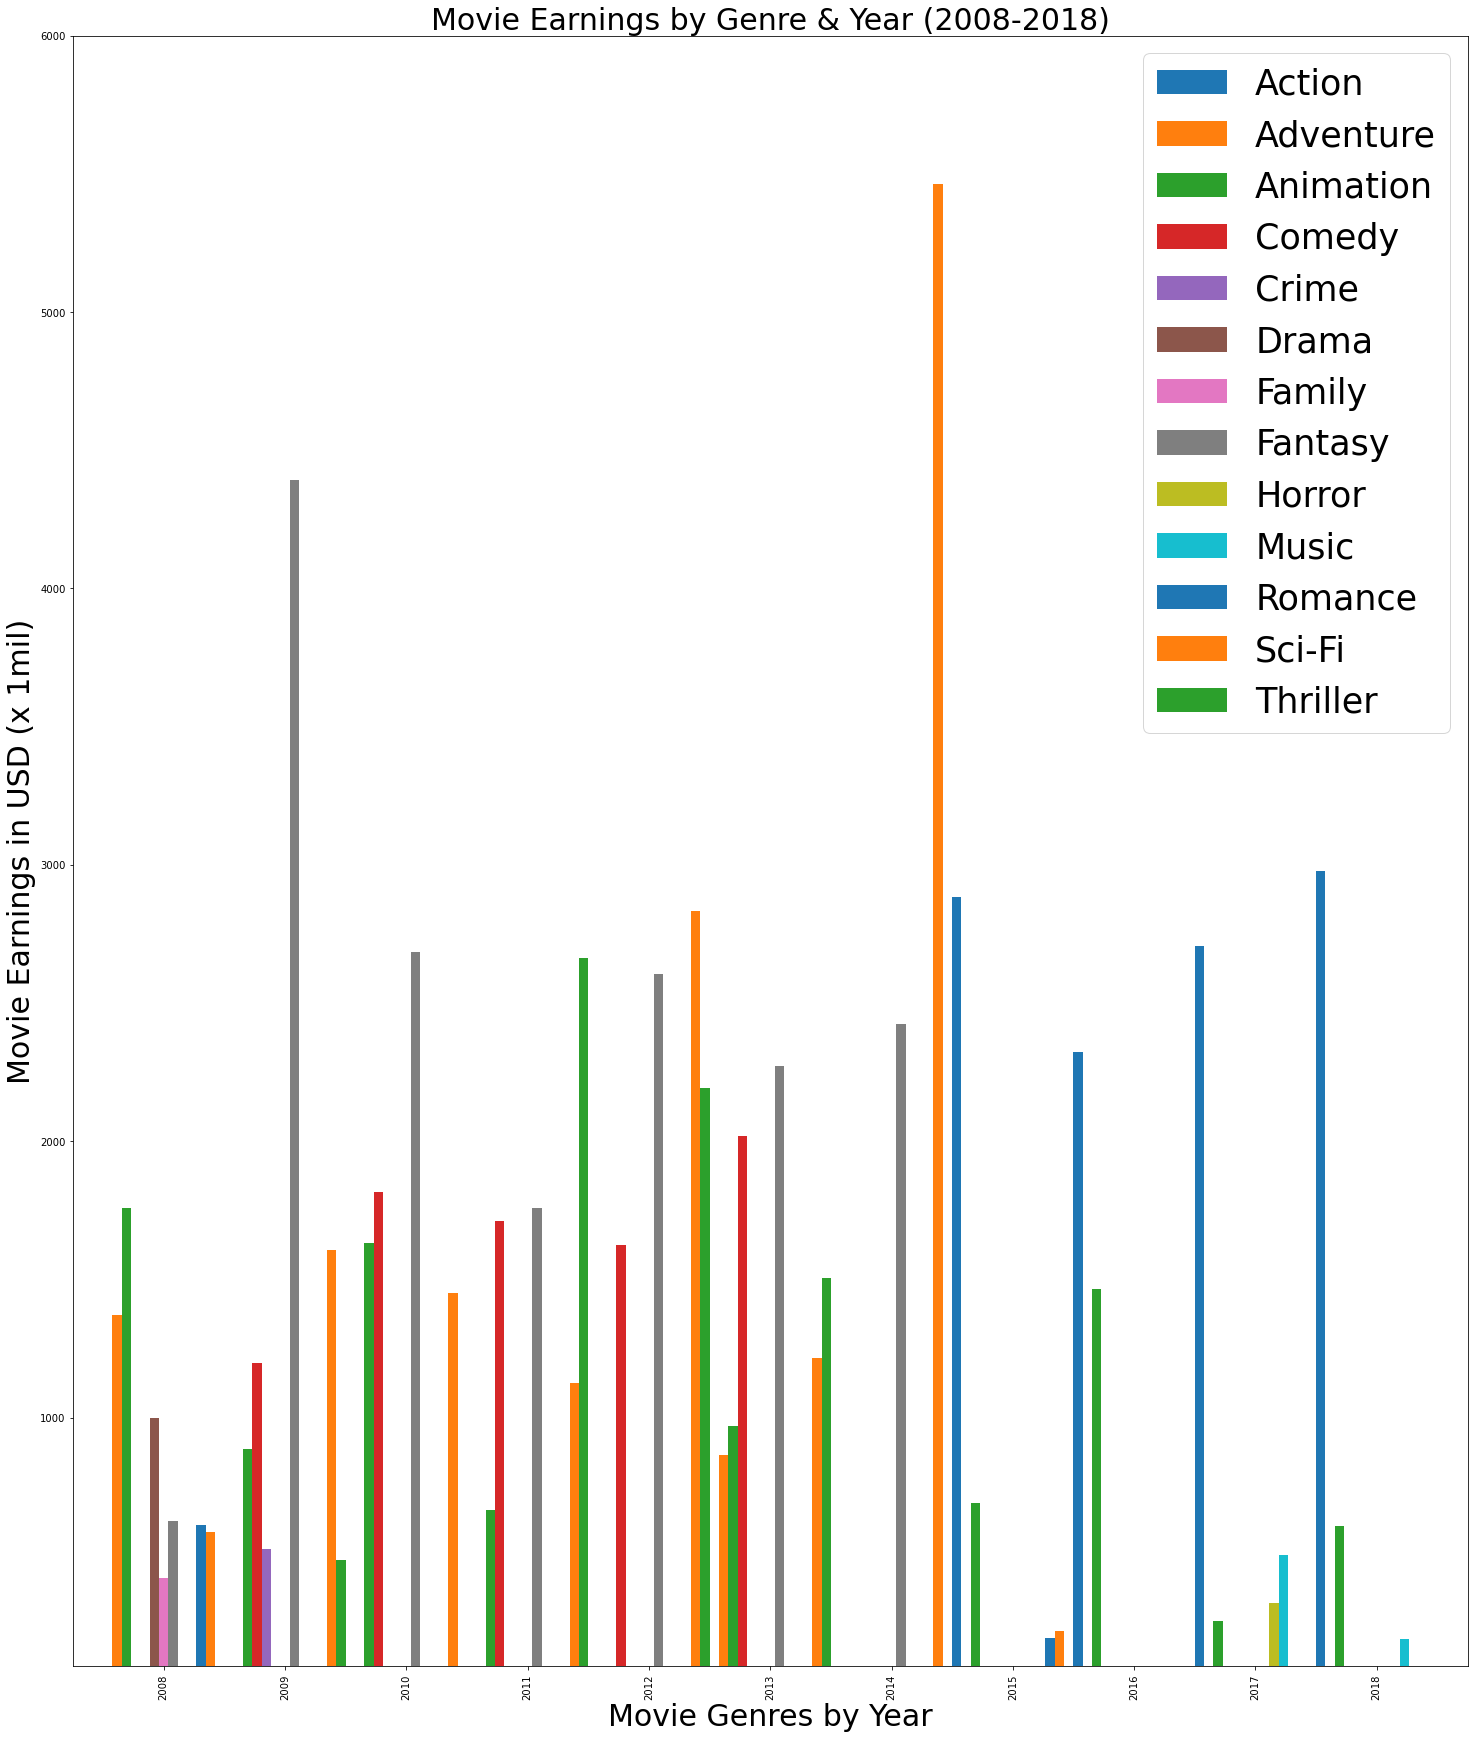

<Figure size 432x288 with 0 Axes>

In [10]:


# Create the chart.
movie_genre.groupby(["Year", "Genre"])["Earnings"].sum().unstack("Genre").plot.bar(figsize=(25, 30), width=1)
# Label our chart.
plt.xlabel('Movie Genres by Year', fontsize=30)
plt.ylabel('Movie Earnings in USD (x 1mil)', fontsize=30)
plt.title('Movie Earnings by Genre & Year (2008-2018)', fontsize=30)
plt.ylim(100, 6_000)
plt.legend(prop={"size":35})

# Show the chart
plt.show()
# Export to PNG
plt.savefig('genre_earnings_by_year.png')

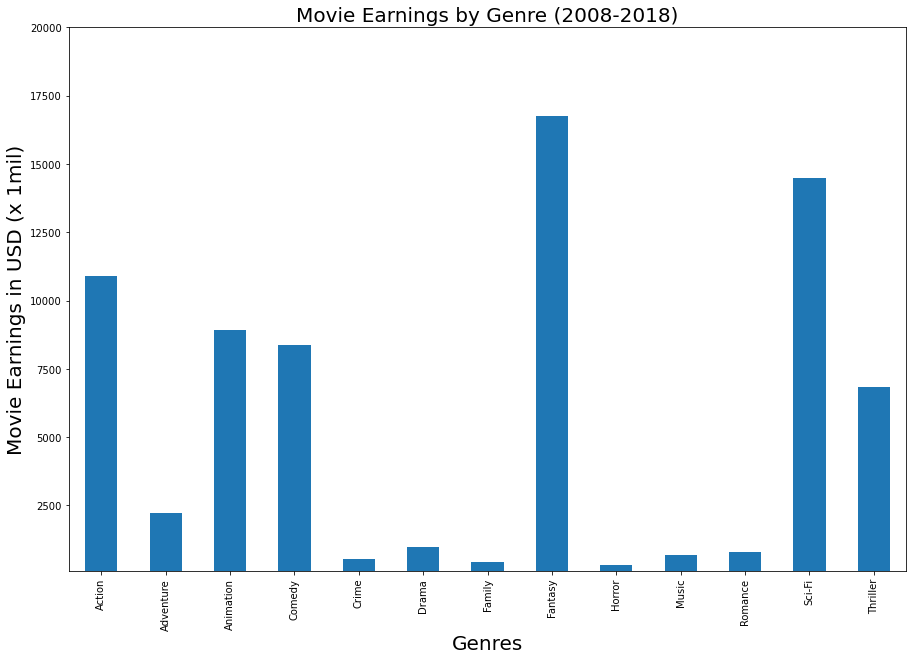

<Figure size 432x288 with 0 Axes>

In [6]:
# Create a chart to show movie success by genre overall
movie_genre.groupby(["Genre"])["Earnings"].sum().plot(kind="bar", figsize=(15, 10))
plt.xlabel('Genres', fontsize=20)
plt.ylabel('Movie Earnings in USD (x 1mil)', fontsize=20)
plt.title('Movie Earnings by Genre (2008-2018)', fontsize=20)
plt.ylim(100, 20_000)
# Show the chart
plt.show()
# Save as PNG
plt.savefig('genre_earnings_overall.png')